<a href="https://colab.research.google.com/github/JoshuaBarsky/Projects/blob/main/Chessboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image

In [ ]:
positions = np.zeros((8,8))
#0 = Empty
#1 = Pawn
#3 = Rook
#4 = Knight
#5 = Bishop
#6 = Queen
#7 = King

In [ ]:
def boardImage(positions):
  pixels = np.random.randint(0,256,(721,721,3), dtype = np.uint8)


  for i in range(len(pixels)):
    for k in range(len(pixels)):
      pixels[i][k] = (230,230,230)
    for j in range(9):
      pixels[i][j*90] = (0,0,0)

  for i in range(9):
    for j in range(len(pixels)):
      pixels[i*90][j] = (0,0,0)

  for i in range(len(positions)):
    for j in range(len(positions)):
      if positions[i][j] == 0.0:
        pixels = drawPawn(i,j, pixels)

  return pixels

In [ ]:
def drawPawn(i,j, pixels):
  pixels[i*90+45][j*90+45] = 0
  return pixels

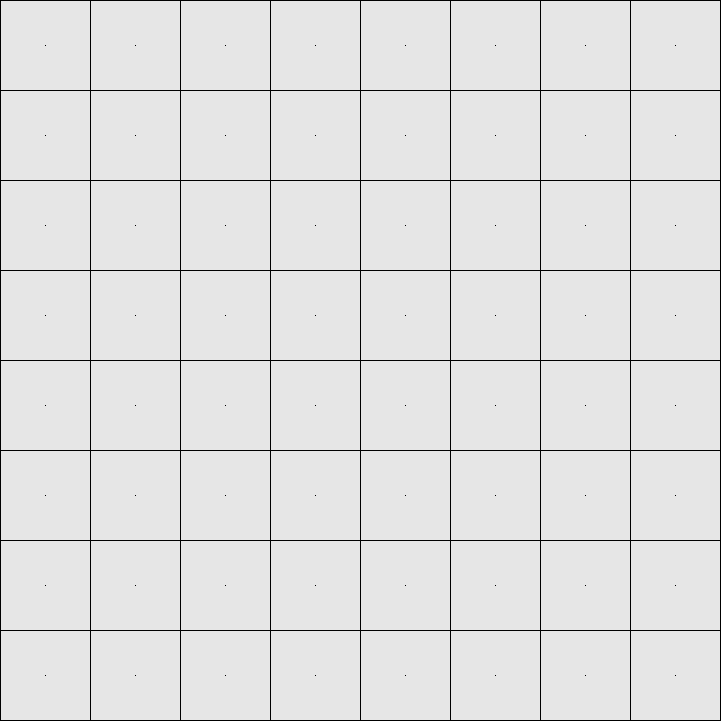

In [ ]:
img = Image.fromarray(boardImage(positions))
display(img)
img.save('dots.png')